In [1]:
import anndata
import pandas as pd
from ALLCools.clustering import cluster_enriched_features
from ALLCools.mcds import MCDS
import joblib

In [2]:
_dir = '/home/qzeng/project/aging/231117_update_annot'
mc_meta_path = '/home/qzeng/project/aging/231117_update_annot/240104_mC_META.csv'
gene_annotation_path = '/gale/netapp/home/wtian/refs/mouse/mm10/gencode/v22/gencode.vM22.basic.annotation.gene.flat.tsv.gz'
mcds_path = '/ceph/gale-1/qzeng/AmbData/geneslop2k_frac.mcds'
mc_type = 'CHN'

In [3]:
mc_meta = pd.read_csv(mc_meta_path, index_col = 0)
cell_num = mc_meta['AgingMajorType'].value_counts()
use_cts = cell_num.head(30).index

/home/qz/miniconda3/envs/allcools/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# use_cts = ['CEA-BST Gaba', 'L6b/CT ENT Glut', 'MEA-COA Glut', 'L2/3 IT PPP Glut',
#            'PAG Glut', 'STR-PAL Chst9 Gaba','L2/3 IT ENT Glut',
#            'LA-BLA-BMA-PA Glut', 'MEA-BST Gaba','STR D1 Sema5a Gaba', 'L2/3 IT PIR-ENTl Glut',
#             'PB Evx2 Glut',  'ENTmv-PA-COAp Glut', 'L5 NP CTX Glut']

In [5]:
use_mc_meta = mc_meta[mc_meta['AgingMajorType'].isin(use_cts)]

In [6]:
gene_frac_da = MCDS.open(
    mcds_path, 
    obs_dim='cell', 
    #var_dim='chrom100k',
    use_obs=use_mc_meta.index,  )['geneslop2k_da_frac']
gene_frac_da

<xarray.DataArray 'geneslop2k_da_frac' (cell: 107217, geneslop2k: 39681, mc_type: 2)>
dask.array<xarray-<this-array>, shape=(107217, 39681, 2), dtype=float32, chunksize=(10000, 39681, 1), chunktype=numpy.ndarray>
Coordinates:
  * cell              (cell) <U42 'AMB_200218_9mo_8E_9H_8J_9J_2_P1-3-B24-P5' ...
  * geneslop2k        (geneslop2k) <U21 'ENSMUSG00000102693.1' ... 'ENSMUSG00...
    geneslop2k_chrom  (geneslop2k) <U5 'chr1' 'chr1' 'chr1' ... 'chrX' 'chrX'
    geneslop2k_end    (geneslop2k) int32 3076321 3104124 ... 170021280 170680053
    geneslop2k_start  (geneslop2k) int32 3071252 3100015 ... 170007658 170670643
  * mc_type           (mc_type) <U3 'CGN' 'CHN'
    strand_type       <U4 'both'

In [7]:
gene_frac_da = gene_frac_da.sel(mc_type=mc_type).load()
gene_frac_da = gene_frac_da.to_pandas()
gene_frac_da

geneslop2k,ENSMUSG00000102693.1,ENSMUSG00000064842.1,ENSMUSG00000051951.5,ENSMUSG00000102348.1,ENSMUSG00000102592.1,ENSMUSG00000088333.2,ENSMUSG00000102343.1,ENSMUSG00000025900.12,ENSMUSG00000025902.13,ENSMUSG00000104238.1,...,ENSMUSG00000031358.17,ENSMUSG00000081500.1,ENSMUSG00000031355.16,ENSMUSG00000031352.10,ENSMUSG00000087159.7,ENSMUSG00000081137.3,ENSMUSG00000087587.1,ENSMUSG00000035299.16,ENSMUSG00000095562.8,ENSMUSG00000093806.1
cell,,,,,,,,,,,,,,,,,,,,,
AMB_200218_9mo_8E_9H_8J_9J_2_P1-3-B24-P5,1.000000,1.000000,0.334141,0.213641,1.000000,0.941256,0.981984,1.016190,0.940740,1.000000,...,0.834275,2.142493,1.563573,0.683449,1.534673,1.000000,0.381984,1.464889,1.000000,1.000000
AMB_200218_9mo_8E_9H_8J_9J_2_P1-3-B24-L6,0.312647,1.000000,0.768333,1.000000,1.000000,1.000000,0.709847,0.994701,0.494300,1.297795,...,0.459679,1.000000,1.279826,2.979473,1.799789,0.494300,2.142858,1.345517,1.000000,1.000000
AMB_200218_9mo_8E_9H_8J_9J_2_P1-3-B24-O17,1.572978,1.000000,0.461056,0.448257,1.000000,1.000000,0.056869,0.991688,1.000000,1.000000,...,0.219153,0.268756,1.148599,0.070026,0.172596,1.000000,0.113975,1.508454,1.000000,0.259712
AMB_200218_9mo_8E_9H_8J_9J_2_P1-3-B24-M6,1.000000,1.246780,0.591370,1.000000,1.000000,0.546416,0.867308,0.863379,1.000000,1.000000,...,0.265462,1.000000,1.733676,1.100291,0.846809,0.247297,1.446182,2.057873,1.000000,1.000000
AMB_200218_9mo_8E_9H_8J_9J_2_P1-3-B24-C5,0.260504,0.265173,0.835600,0.353997,1.000000,0.260504,0.383782,0.735163,0.407884,0.516894,...,1.000000,1.000000,1.212265,0.547141,3.086846,1.000000,0.265173,1.383496,0.285652,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12E_M_3057,0.606559,1.332900,0.670960,1.000000,0.819133,0.888321,1.023679,0.604834,0.473745,0.333205,...,0.374418,1.000000,1.126050,0.724950,1.310230,0.670202,1.097010,1.162625,0.647110,0.259464
12E_M_3054,1.007762,0.882438,0.696948,0.953787,0.445865,1.050513,0.576207,0.784874,0.431888,0.629758,...,0.565039,1.000000,1.276601,0.660412,0.666874,0.445865,1.280820,1.416371,0.514258,0.527750
12E_M_3059,0.580227,3.106755,1.495200,0.446384,0.515026,0.412157,0.427151,0.606487,1.000000,1.000000,...,1.015941,0.560075,0.559958,0.459083,1.755829,1.897935,0.532495,0.975484,0.566635,0.299782


In [8]:
adata = anndata.AnnData(gene_frac_da)
adata.obs['AgingMajorType'] = mc_meta['AgingMajorType']

In [9]:
gene_meta = pd.read_csv(
    '/home/hanliu/ref/mouse/gencode/vm22/gencode.vM22.annotation.gene.flat.tsv.gz',
    index_col='gene_id',
    sep='\t')
id_to_name = gene_meta['gene_name'].to_dict()

Found 30 clusters to compute feature enrichment score
Computing enrichment score
Computing enrichment score FDR-corrected P values
Selected 211 unique features


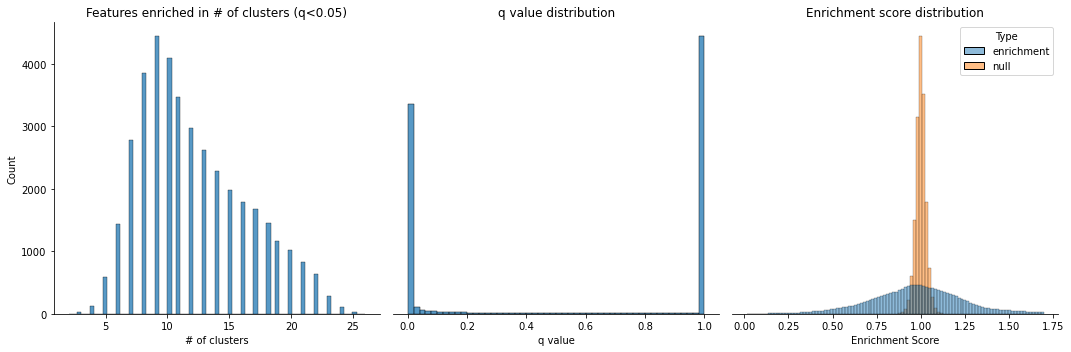

In [10]:
cluster_enriched_features(adata,
                          cluster_col='AgingMajorType',
                          top_n=10,
                          alpha=0.05,
                          stat_plot=True,
                          method='mc')

In [24]:
adata

AnnData object with n_obs × n_vars = 107217 × 39681
    obs: 'AgingMajorType'
    var: 'AgingMajorType_enriched_features'
    uns: 'AgingMajorType_feature_enrichment'

In [11]:
cluster_cef = pd.DataFrame(
    adata.uns['AgingMajorType_feature_enrichment']['enrichment'],
    index=adata.var_names,
    columns=adata.uns['AgingMajorType_feature_enrichment']['cluster_order'])

In [12]:
cef_rank = pd.DataFrame({
    col: cluster_cef[col].sort_values(ascending=False).rank(ascending=False)
    for col in cluster_cef.columns
})

In [13]:
cef_rank.to_csv('AgingMajorType.Rank.csv')

In [14]:
cef_rank

,Astro-TE NN,CA1-ProS Glut,CA3 Glut,CEA-BST Gaba,DG Glut,ENTmv-PA-COAp Glut,L2/3 IT CTX Glut,L2/3 IT ENT Glut,L2/3 IT PIR-ENTl Glut,L2/3 IT PPP Glut,...,OPC NN,Oligo NN,PAG Glut,PB Evx2 Glut,Pvalb Gaba,STR D1 Gaba,STR D1 Sema5a Gaba,STR D2 Gaba,STR-PAL Chst9 Gaba,Sst Gaba
geneslop2k,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001.4,NaN,NaN,23436.0,NaN,NaN,NaN,3323.0,NaN,9509.0,NaN,...,NaN,NaN,7935.0,9174.0,10799.0,12833.0,10702.0,NaN,13081.0,6650.0
ENSMUSG00000000003.15,NaN,NaN,6778.0,NaN,19804.0,16240.0,NaN,13240.0,11381.0,7190.0,...,NaN,14839.0,NaN,NaN,NaN,NaN,10146.0,NaN,8140.0,NaN
ENSMUSG00000000028.15,5969.0,NaN,16521.0,NaN,3414.0,NaN,NaN,NaN,NaN,6143.0,...,6699.0,NaN,NaN,NaN,NaN,13944.0,2999.0,5714.0,3440.0,NaN
ENSMUSG00000000031.16,12730.0,14503.0,16392.0,NaN,14837.0,NaN,4292.0,NaN,NaN,15416.0,...,10195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000000037.17,9491.0,NaN,NaN,NaN,1552.0,NaN,NaN,NaN,NaN,NaN,...,9688.0,2215.0,NaN,NaN,NaN,12218.0,5894.0,4932.0,8379.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000118478.1,9608.0,NaN,NaN,NaN,21137.0,15557.0,NaN,NaN,NaN,NaN,...,8496.0,13820.0,NaN,NaN,NaN,NaN,5773.0,14745.0,10795.0,NaN
ENSMUSG00000118479.1,NaN,8521.0,13506.0,11074.0,NaN,8818.0,NaN,4945.0,9738.0,8352.0,...,NaN,NaN,10089.0,8336.0,10472.0,15502.0,NaN,NaN,NaN,7746.0
ENSMUSG00000118483.1,NaN,16997.0,21436.0,NaN,19599.0,12443.0,NaN,NaN,15113.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
marker_dict = {}
for ct in use_cts:
    tmp_rank = cef_rank[ct].sort_values()
    top_genes =tmp_rank.head(10).index
    top_genes = [id_to_name[gene_id] for gene_id in top_genes]
    marker_dict[ct] = top_genes

In [23]:
joblib.dump(marker_dict, "AgingMajorType.Marker.Dict")

['AgingMajorType.Marker.Dict']